# Titanic Dataset Exploration
## by SUYASH PRATAP SINGH

## Table of Contents

* Introduction 
* Part1 : Gathering data
* Part2 : Assesing data
* Part3 : Cleaning Data
* Part4 : Univariate Exploration
* Part5 : Bivariate Exploration
* Part6 : Multivariate Exploration

## Intoduction
The sinking of Titanic is one of the most notorius shipwrecks in the history. In 1912, during her voyage, Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.



## Preliminary Wrangling

> I have used the titanic dataset for exploration

## Part1 : Gathering data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
#load the dataset
df = pd.read_csv('train.csv')

## Part2: Assessing Data

In [3]:
# check first five records
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# randomly display the records
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.150,NaN,S
376,377,1,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.250,NaN,S
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.525,NaN,C
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.750,NaN,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.000,E33,S


In [5]:
# view info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# check for duplicates exist
df.duplicated().sum()

0

In [7]:
# View descriptive statistics of the dataframe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.941765,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.766785,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.750000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,92.000000,8.000000,6.000000,512.329200


In [8]:
# number of rows and columns
df.shape

(891, 12)

In [9]:
df[df.Cabin.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Quality issues

* Most of the cabin details are missing
* Two Embarked details are missing
* 177 age values are missing 
* cabin details are not my interest for exploration
* We can calculate/ fille the missing values of cabins
* Age values can also be calculated and filled

## Part3: Cleaning Data

In [11]:
# Create copies of original Dataframes
df_clean = df.copy()

In [12]:
# display copied data frame
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Define</b>

Cabin is not my interest for exploration and many values are missing so delete the column


<b> Code </b>

In [13]:
df_clean.drop(['Cabin'],inplace=True,axis = 1)

<b> Test </b>

In [14]:
# now display the dataframe
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<b> Define </b>

There are two missing values in the embarked column, fill those missing values

<b> Code </b>

In [15]:
df_clean['Embarked'] = df_clean['Embarked'].fillna("C")

<b> Test </b>

In [16]:
df_clean[df_clean['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


<b> Define </b>

There are missing values in the age cloumn, fill those values

<b> Code </b>

In [17]:
mean = df_clean['Age'].mean()

In [18]:
df_clean['Age'].fillna(mean,inplace =True)

<b> Test </b>

In [19]:
df_clean[df_clean['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [20]:
df_clean.info(verbose = True, null_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [21]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
df_clean.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.000000,0,0,349257,7.8958,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.941765,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.7500,Q


In [23]:
# Save cleaned data

df_clean.to_csv('clean_master_file.csv', index =False)

### What is the structure of your dataset?

 The titanic data frames describe the survival status of individual passengers on the Titanic. The titanic data frame does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun bya variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic:
Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by
many researchers and edited by Michael A. Findlay

This dataset contains 891 observations and various variable decription are provided here

#### Variable Description
* PassengerId: unique identifying number for each passenger
* Survived: passenger survived(1) or died(0)
* Pclass: passenger class
* Name: name of passenger
* Sex: gender of passenger
* Age: age of passenger
* SibSp: number of siblings/spouses
* Parch: number of parents/children
* Ticket: ticket number
* Fare: amount of money spent on ticket
* Cabin: cabin category
* Embarked: port where passenger embarked(C = Cherbourg, Q = Queenstown, S = Southampton)

### What is/are the main feature(s) of interest in your dataset?

> I would like to explore the number of people survied , number of people died and also number of siblings and parents survived , what age group survived

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I would exploit the age,sex columns the most. I belive survived column would help me for ananlysis

## Part4: Univariate Exploration

> In this section I would like to explore the frequency/ number of people survived , counts of male and females , trend of Pclass, trend of embarked and many more

In [28]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = df_clean[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable,size = 30)
    plt.show()
    print("{}:\n {}".format(variable,varValue))

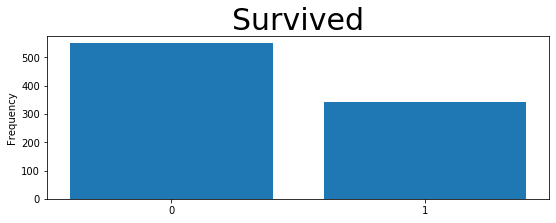

Survived:
 0    549
1    342
Name: Survived, dtype: int64


In [29]:
# number of people survived 1 indicates survived 0 indicates died

bar_plot('Survived')


The above clearly shows 549 people were dead and only 342 people were survived

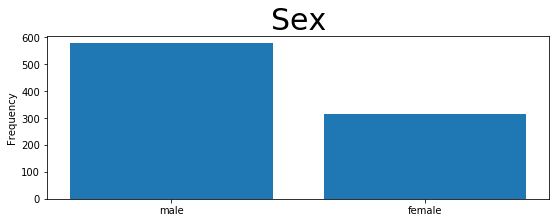

Sex:
 male      577
female    314
Name: Sex, dtype: int64


In [30]:
bar_plot('Sex')

From the above graph it is clear that there was 577 male and 314 female

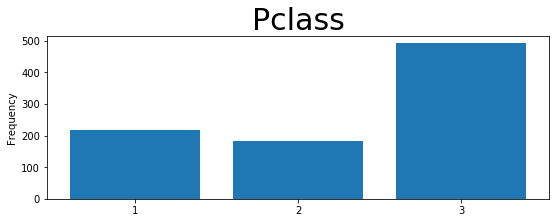

Pclass:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


In [31]:
bar_plot('Pclass')

Above graph shows that there were 491 people in 3rd class , 184 in 2nd class and 216 in 1st class

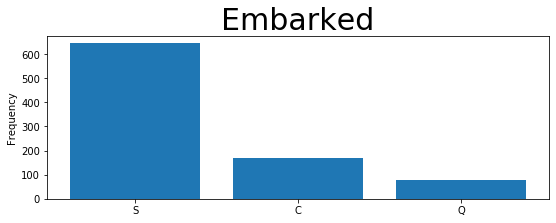

Embarked:
 S    644
C    170
Q     77
Name: Embarked, dtype: int64


In [32]:
bar_plot('Embarked')

It is clear that number of passenger embarked at Cherbourg is 170 ,Queenstown = 77, Southampton = 644

## Scatter matrix

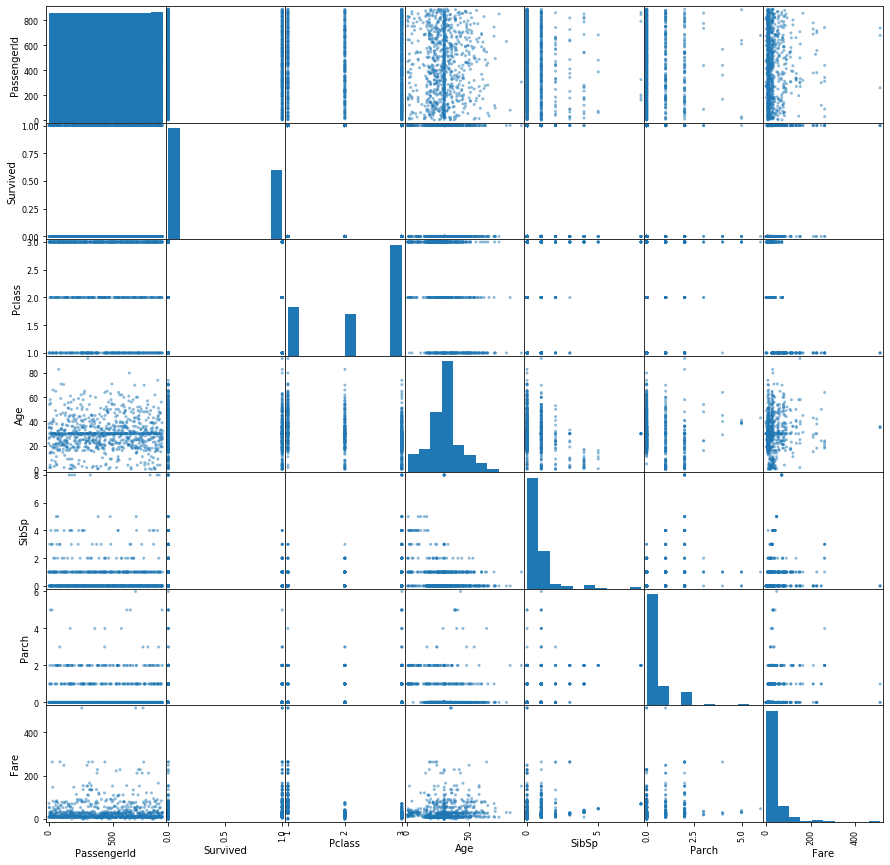

In [72]:


pd.plotting.scatter_matrix(df_clean, figsize=(15,15));

The above is the scatter matrix for the all the variables in the dataset

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was no such points in my analysis

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was lot of missing data in cabin cloumn since my interest was not on that , i droped that column . The age and Emabrked had missing values those were filled appropriately.

## Part5:  Bivariate Exploration

> In this section I would like to explore number of siblings/spouses survived, number of parents or children survived, Number of people in Pclass survived, what age group survived and many more.

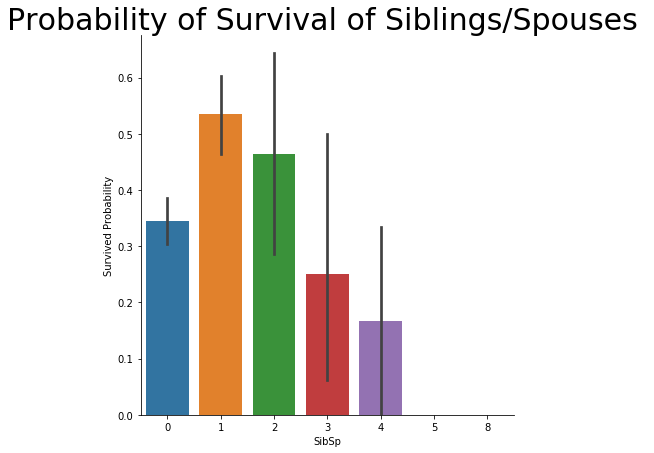

In [34]:
g = sb.catplot(x = "SibSp", y = "Survived", data = df_clean, kind = 'bar', height = 6)
g.set_ylabels("Survived Probability")
plt.title("Probability of Survival of Siblings/Spouses ",size = 30)
plt.show();

* Having many siblings have less chance of survival
* if Sibsp == 0 or 1 or 2 has more chance of survival


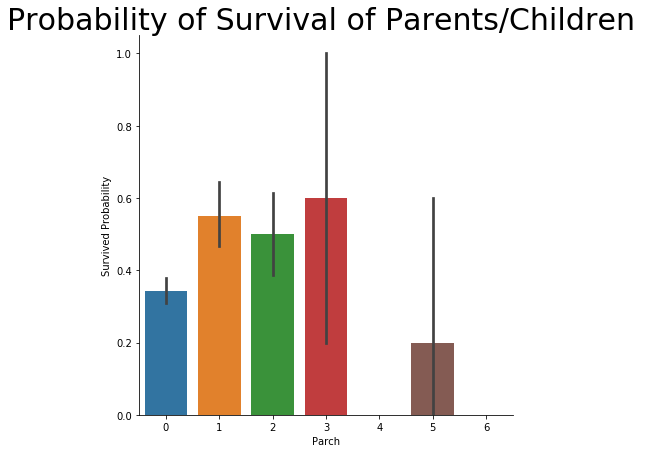

In [35]:
g = sb.catplot(x = "Parch", y = "Survived", data = df_clean, kind = "bar", height = 6)
g.set_ylabels("Survived Probability")
plt.title("Probability of Survival of Parents/Children ",size = 30)

plt.show()


small families have more chance to survive. The standard deviation for the passenger with Parch = 3 is more

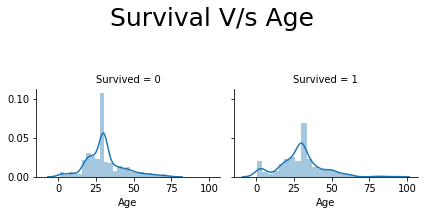

In [42]:
g = sb.FacetGrid(df_clean, col = "Survived")
g.map(sb.distplot, "Age", bins = 25)
plt.subplots_adjust(top=0.6)
g.fig.suptitle("Survival V/s Age",size = 25)

plt.show()

* Age <= 20 has high survival rate
* Most passengers at age between 25 -50 are survived


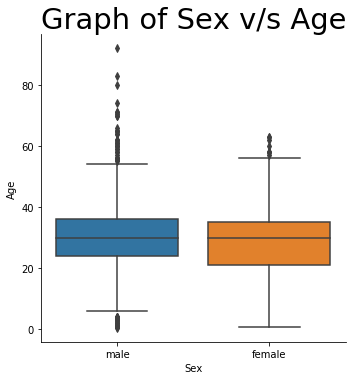

In [43]:
sb.catplot(x = "Sex", y = "Age", data = df_clean, kind = "box")
plt.title("Graph of Sex v/s Age" ,size=29)
plt.show()

Sex is not informative for age prediction, because age distribution seems to be same.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was observed that having less siblings had much chance of survival , having siblings more had least survival.Smaller familes had more chance of survival . Age froup around 25 - 50 were survived .

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Even though the small familes survived the most there was an exception to a family with 5 members because to some extent these were also survived in the disaster

## Part6: Multivariate Exploration

> In this section I would like to explore the embarked, sex, Pclass survivals, Plclass survival and their age and many more intersting things 

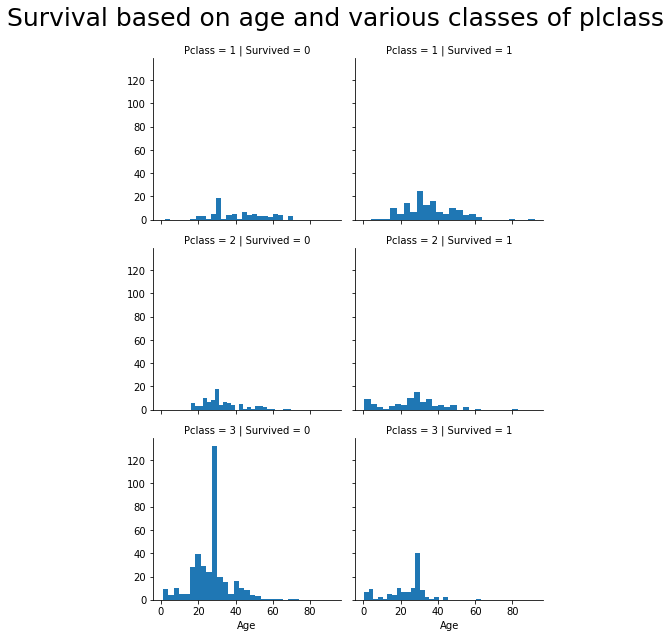

In [46]:
g = sb.FacetGrid(df_clean, col = "Survived", row = "Pclass", height = 3)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Survival based on age and various classes of plclass",size =25)
plt.show()

From the graph it is observed that number of people or passengers dead in pclass 3 and survived in pclass 1

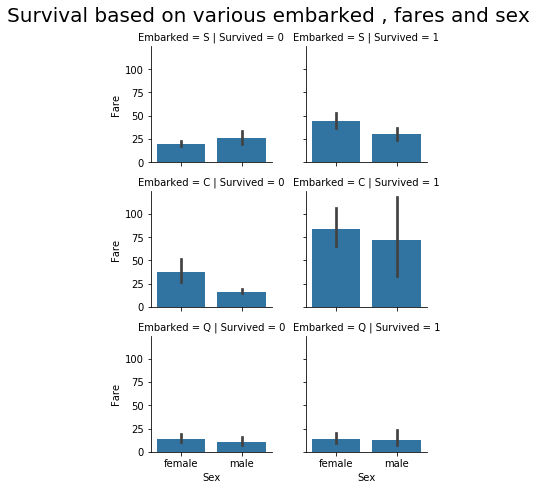

In [62]:
g = sb.FacetGrid(df_clean, row = "Embarked", col = "Survived", height = 2.3)
g.map(sb.barplot, "Sex", "Fare")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Survival based on various embarked , fares and sex",size =20)
plt.show()

Passenger who pay more fare have better survival 

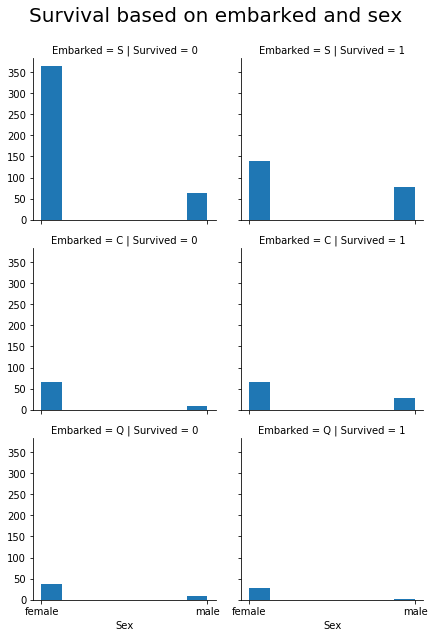

In [65]:
g = sb.FacetGrid(df_clean, col = "Survived", row = "Embarked", height = 3)
g.map(plt.hist, "Sex", bins = 8)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Survival based on embarked and sex",size =20)
g.add_legend()
plt.show()

From the graph it is observed that:
In emanarked c : Most of the females lost their life compared to men
In embarked Q : men lost the life more and female is approx 1:1 ratio
overall max female lost their life 

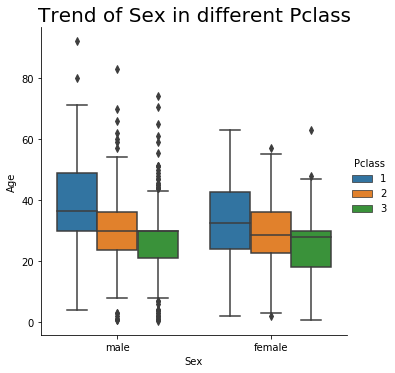

In [67]:
sb.catplot(x = "Sex", y = "Age", hue = "Pclass", data = df_clean, kind = "box")
plt.title("Trend of Sex in different Pclass",size = 20)
plt.show()

1st class passengers are older than 2nd class, and 2nd class is older than 3rd class.

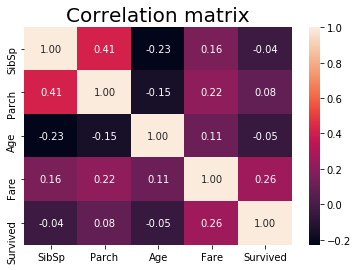

In [68]:
list1 = ["SibSp","Parch","Age","Fare","Survived"]
sb.heatmap(df_clean[list1].corr(), annot = True, fmt = ".2f")
plt.title("Correlation matrix",size=20)
plt.show()

The above plot shows the correlation between sibsp, parch, age ,fare survived

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It is observed that there are 3 pclass type that is 1, 2 and 3 .It was noticed that passengers in class 1 were older than 2 , passenger in class 2 were older than 1. The number of survival in pclass 1 was more compared to pclass 3 and also observed that passenger who pays more fares has more survival

### Were there any interesting or surprising interactions between features?

> Though survival rate is less , it was observed that more number of female passengers lost their life in the disaster